In [1]:
import yfinance as yf

In [2]:
from datetime import datetime
end_time = datetime.now()
start_time = datetime(end_time.year - 20, end_time.month, end_time.day)

In [3]:
stock = "GOOG"
goog_data = yf.download(stock, start = start_time, end = end_time, auto_adjust = False)


*********************100%***********************]  1 of 1 completed

In [4]:
goog_data.head()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2005-06-20,7.098541,7.140735,7.164894,6.767882,6.876475,844140229
2005-06-21,7.126765,7.169128,7.230399,7.097646,7.174857,607560783
2005-06-22,7.162914,7.205492,7.280710,7.189801,7.214708,420530365
2005-06-23,7.173067,7.215704,7.342728,7.135753,7.173113,564363474
2005-06-24,7.359753,7.403500,7.422180,7.212466,7.245343,713512433


In [5]:
goog_data.shape

(5031, 6)

In [6]:
goog_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5031 entries, 2005-06-20 to 2025-06-17
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, GOOG)  5031 non-null   float64
 1   (Close, GOOG)      5031 non-null   float64
 2   (High, GOOG)       5031 non-null   float64
 3   (Low, GOOG)        5031 non-null   float64
 4   (Open, GOOG)       5031 non-null   float64
 5   (Volume, GOOG)     5031 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 275.1 KB


In [7]:
goog_data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5.031000e+03
mean,52.282855,52.566633,53.110087,52.010605,52.544993,9.824800e+07
std,49.527051,49.755152,50.298963,49.214102,49.726097,1.233379e+08
min,6.374078,6.411966,6.709103,6.159413,6.538243,1.584340e+05
25%,13.841039,13.923312,14.107497,13.729538,13.951955,2.586240e+07
50%,29.546764,29.722397,30.083241,29.494200,29.798309,4.590000e+07
75%,72.575603,73.007000,73.784027,72.291500,73.087749,1.219052e+08
max,207.224548,207.710007,208.699997,204.259995,204.500000,1.650833e+09


In [8]:
goog_data.isna().sum()

Price      Ticker
Adj Close  GOOG      0
Close      GOOG      0
High       GOOG      0
Low        GOOG      0
Open       GOOG      0
Volume     GOOG      0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

def graph(figsize,column, column_name) :
    plt.figure()
    column.plot(figsize = figsize)
    plt.xlabel('years')
    plt.ylabel(column_name)
    plt.title(f"{column_name} over past 20 years")

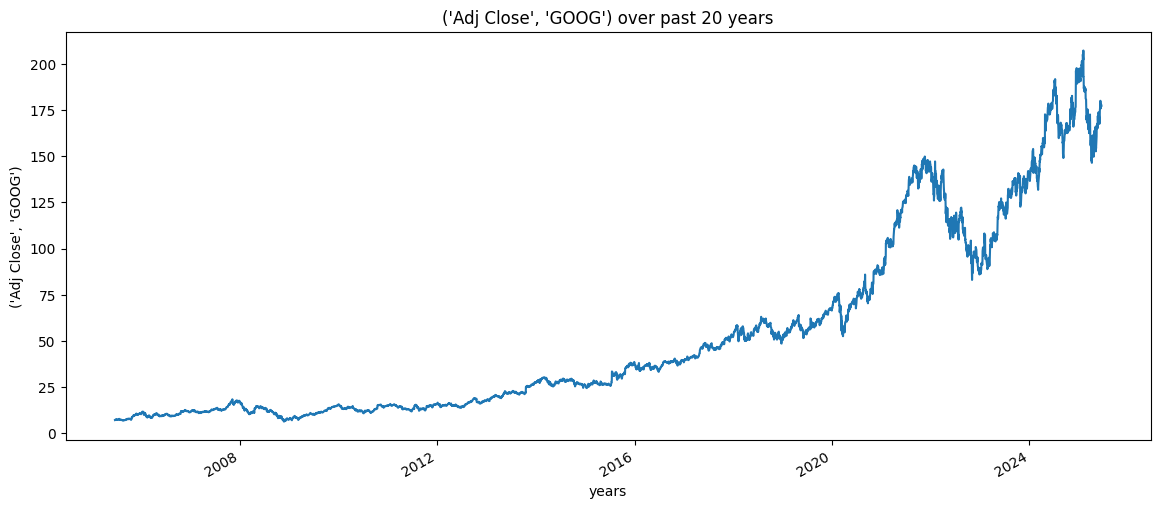

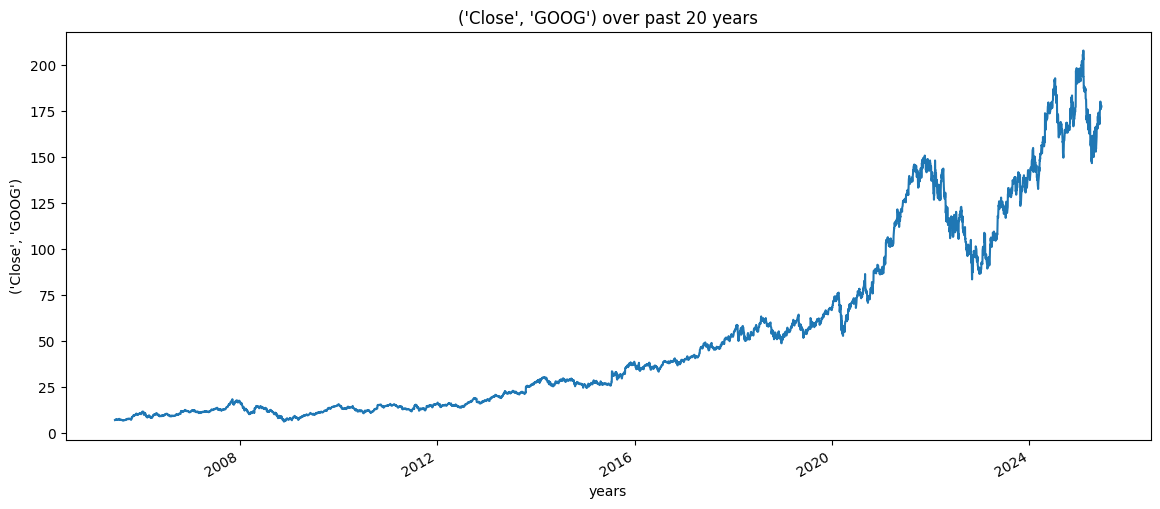

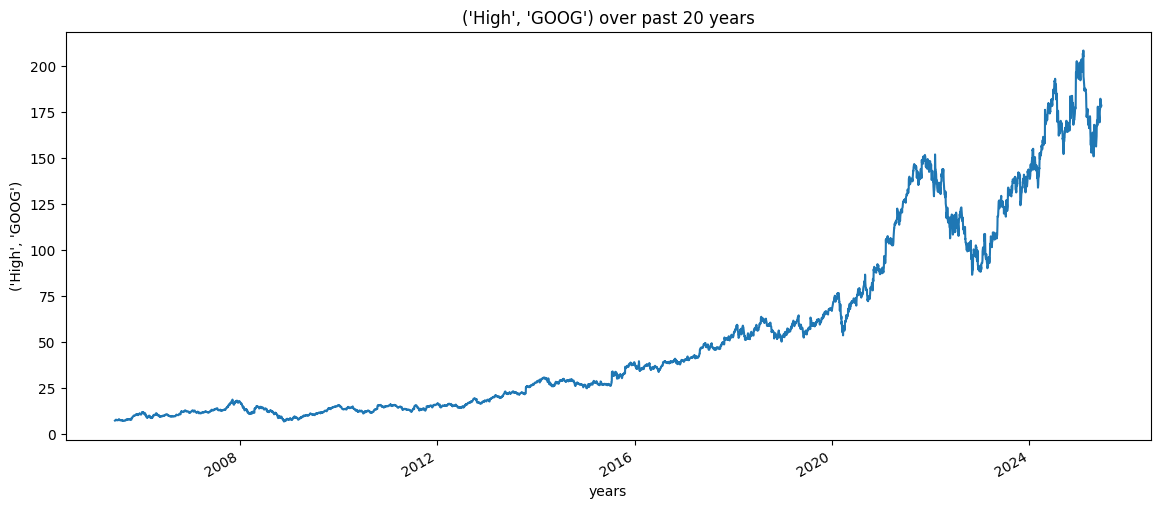

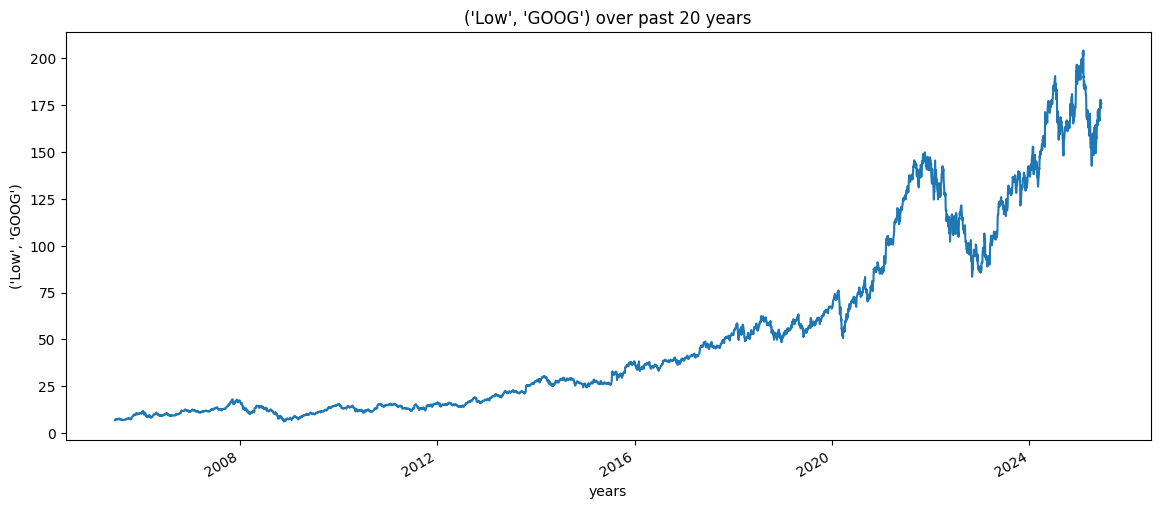

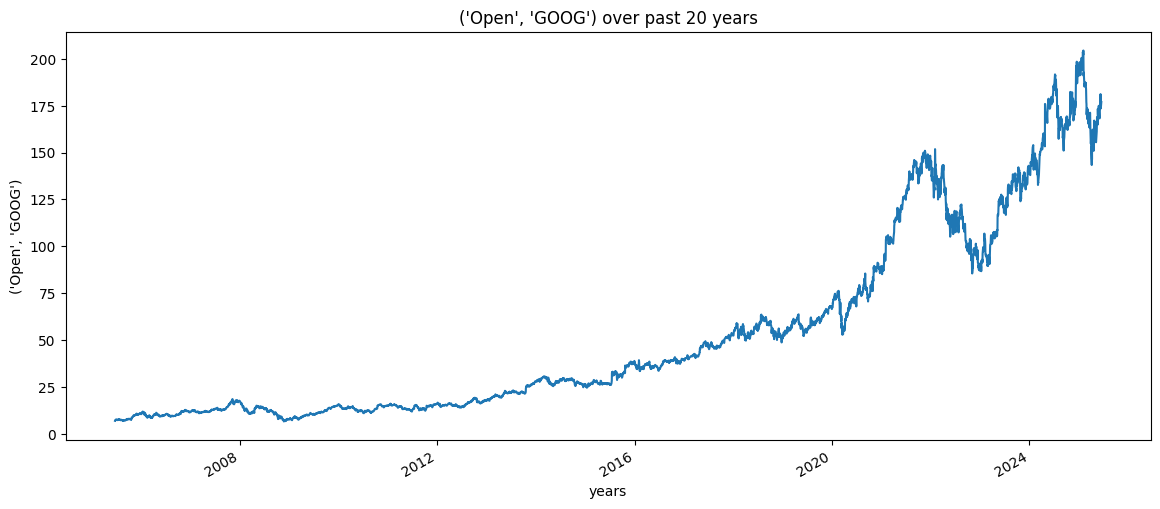

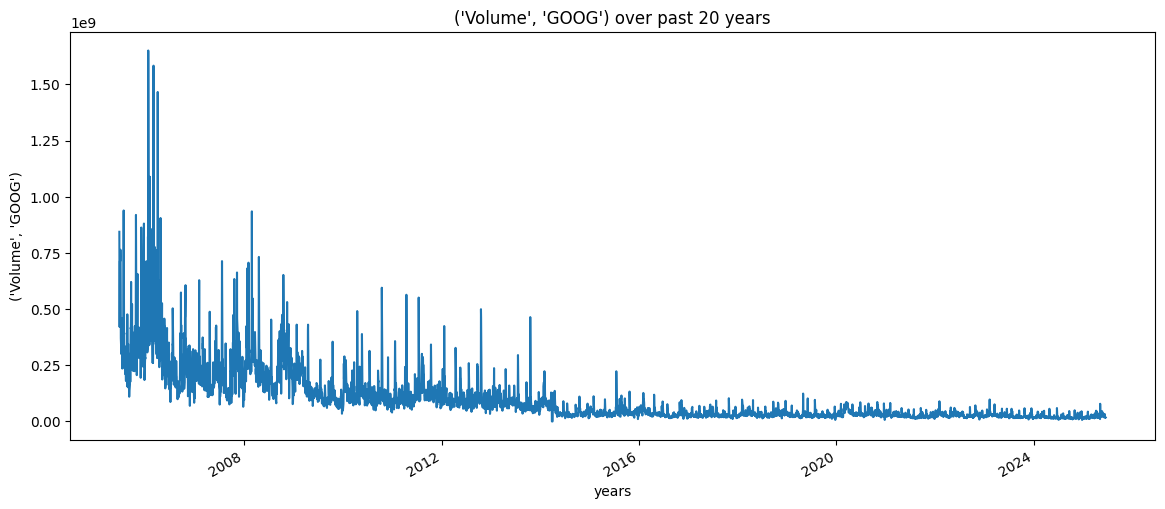

In [10]:
for column in goog_data.columns :
    graph((14,6), goog_data[column], column)

In [11]:
def moving_average(window) :
    goog_data[f'moving_average_with_{window}_days'] = goog_data['Adj Close'].rolling(window = window).mean()

In [12]:
moving_average(250)

In [13]:
goog_data.tail()

Price,Adj Close,Close,High,Low,Open,Volume,moving_average_with_250_days
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG,
Date,,,,,,,
2025-06-11,178.789993,178.789993,181.750000,178.000000,181.229996,18994400,173.278966
2025-06-12,176.970001,176.970001,178.130005,176.110001,177.479996,17345900,173.272038
2025-06-13,175.880005,175.880005,178.343002,173.570007,173.580002,20873200,173.271975
2025-06-16,177.940002,177.940002,178.244995,175.820007,175.904999,18132500,173.273664
2025-06-17,177.229996,177.229996,178.714996,175.940002,177.000000,17627400,173.270881


In [14]:
moving_average(150)

<Figure size 640x480 with 0 Axes>

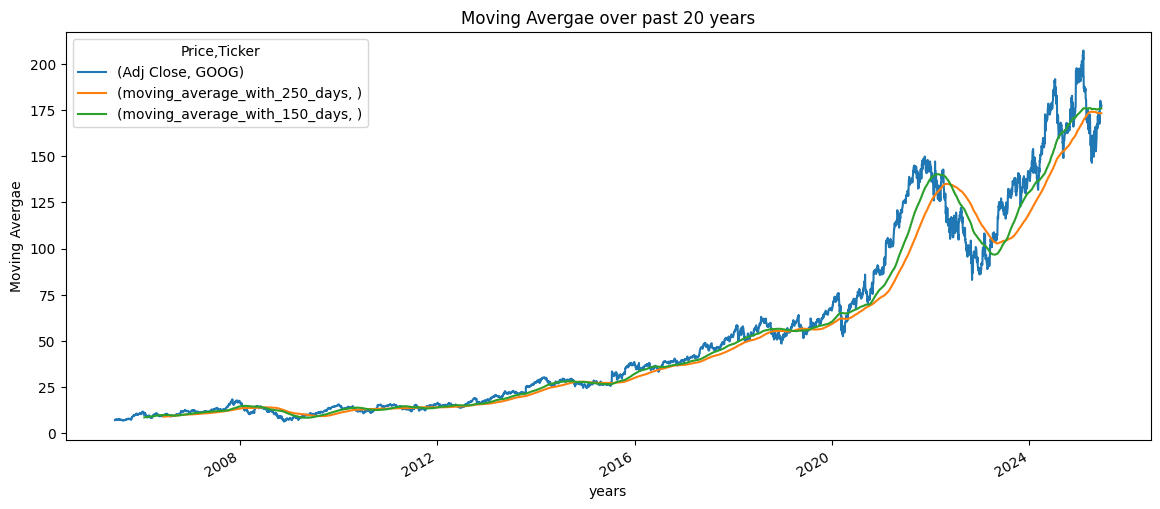

In [15]:
graph((14,6), goog_data[['Adj Close', 'moving_average_with_250_days', 'moving_average_with_150_days']], 'Moving Avergae')

In [16]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(goog_data[['Adj Close']])

In [17]:
def create_sequences(data, window) :
    x = []
    y = []
    for i in range(window, len(scaled_data)) :
        x.append(data[i-window:i])
        y.append(data[i])
    return np.array(x), np.array(y)

In [18]:
X_data, y_data = create_sequences(scaled_data, 100)

In [19]:
splitting_len = int(0.8*len(X_data))

X_train = X_data[:splitting_len]
y_train = y_data[:splitting_len]
X_test = X_data[splitting_len:]
y_test = y_data[splitting_len:]

In [20]:
X_test[1].shape

(100, 1)

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input, Dropout

In [22]:
model = Sequential()
model.add(Input(shape=(60, 1)))  # or 100, depending on your sequence
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(
    monitor = 'val_loss',
    patience = 5,
    restore_best_weights = True
)

In [24]:
model.fit(
    X_train,
    y_train,
    epochs = 10,
    validation_split = 0.1,
    callbacks = early_stop
)

Epoch 1/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 12s 79ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - loss: 1.0849e-04 - val_loss: 3.4495e-04
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 1.0771e-04 - val_loss: 4.1210e-04
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 8.0305e-05 - val_loss: 0.0015
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 7.8793e-05 - val_loss: 5.9211e-04
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 6.5226e-05 - val_loss: 4.3915e-04
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - loss: 6.9772e-05 - val_loss: 8.6126e-04


In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 128)             │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 354,245 (1.35 MB)

 Trainable params: 118,081 (461.25 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 236,164 (922.52 KB)

In [26]:
predictions = model.predict(X_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step 


In [27]:
inverse_predictions = scaler.inverse_transform(predictions)
inverse_test_output = scaler.inverse_transform(y_test)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, predictions))
mae = mean_absolute_error(y_test, predictions)
loss = model.evaluate(X_test, y_test)

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, Test Loss (MSE): {loss:.4f}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 7.6414e-04
RMSE: 0.03, MAE: 0.03, Test Loss (MSE): 0.0012


In [29]:
model.save("goog_stock_price_model.keras")